### Electricity usage prediction notebook
In this notebook I will be using the AI project methodology to predict the yearly electricity usage in households. The goal of this notebook is to get an better insight and understanding of various household chareristics and being able to predict beforehand how much electricity every household is going to use.

In [260]:
import os
import numpy as np
import pandas as pd ## 2.1.0
import seaborn as sns ## 0.12.2
import matplotlib.pyplot as plt
print("pandas version:", pd.__version__)
print("seaborn version:", sns.__version__)

pandas version: 2.1.0
seaborn version: 0.12.2


#  Data Requirements


After conducting research into the factors that impact electricity usage, outlined in the project proposal, I have compiled a list of data requirements.

<table>
  <thead>
    <tr>
      <th>Name</th>
      <th>Data Type</th>
      <th>Units</th>
      <th>Range</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Household size</td>
      <td>Numerical</td>
      <td>Persons</td>
      <td>0-12</td>
    </tr>
    <tr>
      <td>House size</td>
      <td>Numerical</td>
      <td>m²</td>
      <td></td>
    </tr>
    <tr>
      <td>Energy label</td>
      <td>Categorical</td>
      <td></td>
      <td>A++, A+, A, B, C, D, E, F, G</td>
    </tr>
    <tr>
      <td>House type</td>
      <td>Categorical</td>
      <td>Building</td>
      <td>"vrijstaande woningen", "2-onder-1-kapwoning", "hoekwoning", "tussenwoning", "appartement"</td>
    </tr>
    <tr>
      <td>House build year</td>
      <td>Numerical</td>
      <td>Years</td>
      <td>0 - 2023</td>
    </tr>
    <tr>
      <td>Electricity consumption</td>
      <td>Numerical</td>
      <td></td>
      <td>0 - 10000</td>
    </tr>
  </tbody>
</table>

---
Version 1.0


After doing research into what factors impact the electricity usage. Initially I only thought about house features, but after speaking with my teachter and stakeholder they brought electrical devices to me. I did some research and added 3 new features. 

<table>
  <thead>
    <tr>
      <th>Name</th>
      <th>Data Type</th>
      <th>Units</th>
      <th>Range</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Household size</td>
      <td>Numerical</td>
      <td>Persons</td>
      <td>0-12</td>
    </tr>
    <tr>
      <td>House size</td>
      <td>Numerical</td>
      <td>m²</td>
      <td></td>
    </tr>
    <tr>
      <td>Dishwashers</td>
      <td>Numerical</td>
      <td>Amount</td>
      <td></td>
    </tr>
    <tr>
      <td>Lamps</td>
      <td>Numerical</td>
      <td>Amount</td>
      <td></td>
    </tr>
    <tr>
      <td>Refrigerators/freezers</td>
      <td>Numerical</td>
      <td>Amount</td>
      <td></td>
    </tr>
    <tr>
      <td>Energy label</td>
      <td>Categorical</td>
      <td></td>
      <td>A++, A+, A, B, C, D, E, F, G</td>
    </tr>
    <tr>
      <td>House type</td>
      <td>Categorical</td>
      <td>Building</td>
      <td>"vrijstaande woningen", "2-onder-1-kapwoning", "hoekwoning", "tussenwoning", "appartement"</td>
    </tr>
    <tr>
      <td>House build year</td>
      <td>Numerical</td>
      <td>Years</td>
      <td>0 - 2023</td>
    </tr>
    <tr>
      <td>Electricity consumption</td>
      <td>Numerical</td>
      <td></td>
      <td>0 - 10000</td>
    </tr>
  </tbody>
</table>

---
Version 2.0

### Data volume 
Since we are going to predict a numerical value (electricity consumption) that can vary alot, and also with a lot of variatons. We are going to need quite some data to get a good prediction at the minimum I want 20000 rows.

### Define Data Quality Standards

Consistency:
Definition: The uniformity and coherence of data across the dataset.
Criteria:
Check consistency in units across different features: In my case it is important to check if electricity usage and electricity usage per dweller has the same unit.
Verify that categorical variables have consistent labeling.
For my data it is important to check in the columns House type, House size, Energy label, Household size all have consistent and readable labels.
analyse: my Categorical values all have coded labels like zw1292 these should all be encoded to make them consistent and readable. And the units for electricity usage and electricity usage per dweller are the same.

Relevance:
Definition: The degree to which the data is appropriate and useful to predict yearly energy usage in households.
Criteria:
Confirm that selected features align with the objectives of the electricity project. 
Exclude irrelevant or redundant variables to focus analysis.
analyse: After making a heatmap the features have an important correlation with the prediction variable, but the gas usage should be excluded since the project is for electricity.

Usability:

Definition: The extent to which the data is easily accessible and interpretable.
Criteria:
Ensure data is well-organized and structured for analysis.
Provide clear documentation on data definitions and variable meanings.
analyse: This is done by encoding the labels to understandable names instead of random numbers combined with letters. Also I made a brief explenation for every feature in the dataset and every code block has an explenation what the code shows and what the conclusion is.

### Consider Ethical and Legal Aspects
All data used can not be linked to any person or company. My dataset is completely anonymous and can never harm any persons or businesses privacy.

### finish with documenting data requirements
After speaking with teachers and stakeholder I made a new version of my data requirements these can be seen above with version 2.0 below it. there are 3 new features added that have an Impact on electricity consumption of households.

# Data collection

### Collect the Data
After searching for the data I noted in the data requirements. I found a dataset from a reliable source the cbs (centraal bureau van statestieken) that contains the data I am going to need about the house charestics but not the electrical appliances. [Open Data CBS](https://opendata.cbs.nl/statline/portal.html?_la=nl&_catalog=CBS&tableId=85140NED&_theme=125). There are no datasets out there which contains these electrical appliances, however there are datasets with smart readers that can give the electricity consumption per hour or even 10 minutes.


### Where to Store your Collected Data?
Since This is a solo project I decided to keep the data stored locally. However the data source can be found on the link above.

### Use a (traceable) Versioning and Naming System
For my df name I am going to use ElectricityData 

### Determine How and How Often You Want to retrieve (or reload) the data
The data should be reloaded at least every year so it includes the new data about the previous year.

### Data explanation
To start making graphs and making models to predict the energy usage I first need to understand what the data contains and what they mean. I have written a simple and short explenation on what every feature is and represents. 

- 1 Woningtype = Based on data from the Land Registry, homes have been classified by housing type. ("woningen" is translated as "Total dwellings." "vrijstaande woningen" is translated as "detached houses."
"2-onder-1-kapwoning" is translated as "semi-detached houses." "hoekwoning" is translated as "corner houses." "tussenwoning" is translated as "terraced houses." "appartement" is translated as "apartments." "onbekend" is translated as "unknown.")
- 2 Gebruiksoppervlakte = The usable floor area is defined in accordance with the interior space in NEN 2580 and is recorded in whole square meters. Common and public areas are not included in determining the usable floor area.
- 3 Bouwjaar = "Bouwjaar" refers to the year of construction of a building or property. It indicates when the structure was built.
- 4 Bewonersklasse = Number of residents: the number of individuals registered in the Personal Records Database at the address of the respective dwelling.
- 5 Hoofdverwarmingsinstallatie = It refers to the primary heating system in a building or property that provides heat to the entire space.
- 6 perioden =  refers to a specific time frame or interval. In this case 2018, 2019 and 2020.
- 7 AandeelWoningenMetStadsverwarming_1 = AandeelWoningenMetStadsverwarming_1: This variable represents the percentage of residential properties connected to district heating. The data is calculated using information from Energie-Nederland and energy labels.
- 8 AandeelWoningenZonnestroomOpAdres_2 = This variable indicates the percentage of residential properties with solar power installations at their address. The data is derived from sources like CERES (Central Registration of System Elements) from network operators, CertiQ's registrations of Guarantees of Origin and Certificates, and individuals' applications for VAT deduction for solar panels.
- 9 GemiddeldeAardgasleveringTempGecorr_3 = This variable refers to the average natural gas consumption from the public network, adjusted for temperature fluctuations. The data is collected from energy network providers and is temperature-corrected to estimate actual gas deliveries.
- 10 GemiddeldeAardgasTempGecPerOpp_13 = This variable represents the average natural gas consumption per unit of area, adjusted for temperature variations. It is calculated based on gas deliveries from the public network and temperature-corrected to provide accurate measurements.
- 11 GemiddeldeElektriciteitslevering_23 = This variable indicates the average electricity consumption from the public network. Data is collected from network providers and includes both electricity delivery and potential self-generated electricity for larger consumers.
- 12 GemElektriciteitsleveringPerBewoner_33 = This variable measures the average electricity consumption per resident. It is calculated based on electricity deliveries from the public network and takes into account the number of residents in the area.


### Findings

After hours of searching for data even in other countries I conclude that this dataset is the best I am going to find with the time given. It contains the necessary features house wise but not the electrical devices. Also unfortunately this dataset has converted the features from numerical to categories which loses us some information. If you have more time for this project I think doing an Survey would work really wel since the data required, like amount of people living, amount of dishwashers and the rest is something everyone knows about their own household.

# Data Preparation

To make sure the data can be used for my project I am going to need seperate the large string that contains all columns.

In [261]:
## the dataset is im my downloads folder you will need to change this to your own location.

file_path = os.path.join(os.path.expanduser("~"), "Downloads", "energyusagedataset.csv")
with open(file_path, 'r', encoding='utf-8') as file:
    first_line = file.readline()

columns = first_line.strip().split(';')
columns = [col.replace('\ufeff', '').strip('"') for col in columns]  

ElectricityData = pd.read_csv(file_path, sep=';', skiprows=1, names=columns, encoding='utf-8')

print("Column names:")
print(list(ElectricityData.columns))


print("\nSample 10 rows:")
print(ElectricityData.head(10).to_string(index=False))


Column names:
['ID', 'Woningtype', 'Gebruiksoppervlakte', 'Bouwjaar', 'Bewonersklasse', 'Hoofdverwarmingsinstallatie', 'Perioden', 'AandeelWoningenMetStadsverwarming_1', 'AandeelWoningenZonnestroomOpAdres_2', 'GemiddeldeAardgasleveringTempGecorr_3', 'GemiddeldeAardgasTempGecPerOpp_13', 'GemiddeldeElektriciteitslevering_23', 'GemElektriciteitsleveringPerBewoner_33']

Sample 10 rows:
 ID Woningtype Gebruiksoppervlakte Bouwjaar Bewonersklasse Hoofdverwarmingsinstallatie Perioden AandeelWoningenMetStadsverwarming_1 AandeelWoningenZonnestroomOpAdres_2 GemiddeldeAardgasleveringTempGecorr_3 GemiddeldeAardgasTempGecPerOpp_13 GemiddeldeElektriciteitslevering_23 GemElektriciteitsleveringPerBewoner_33
  0    T001100             T001116  T001018        T001351                     T001614 2019JJ00                                 5.9                                12.0                                  1240                              11.4                                2760                         

The columns are now in their proper position and the corresponding data is in their column.

In [262]:
ElectricityData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24192 entries, 0 to 24191
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   ID                                      24192 non-null  int64 
 1   Woningtype                              24192 non-null  object
 2   Gebruiksoppervlakte                     24192 non-null  object
 3   Bouwjaar                                24192 non-null  object
 4   Bewonersklasse                          24192 non-null  object
 5   Hoofdverwarmingsinstallatie             24192 non-null  object
 6   Perioden                                24192 non-null  object
 7   AandeelWoningenMetStadsverwarming_1     12096 non-null  object
 8   AandeelWoningenZonnestroomOpAdres_2     24192 non-null  object
 9   GemiddeldeAardgasleveringTempGecorr_3   24192 non-null  object
 10  GemiddeldeAardgasTempGecPerOpp_13       21168 non-null  object
 11  Ge

So every column besides id is an object. Logically speaking bouwjaar, perioden, and the gemiddelde(median) columns should all be numeric.

## missing data
Now I understand what the data means and contains I need to start cleaning the data.
To make sure we can make an accurate prediction that is not based on wrong values I am going to start off by checking the null values.

In [263]:
columns_to_check = ["Woningtype", "Gebruiksoppervlakte", "Bouwjaar", "Bewonersklasse", "Hoofdverwarmingsinstallatie", "Perioden", "AandeelWoningenMetStadsverwarming_1", "AandeelWoningenZonnestroomOpAdres_2", "GemiddeldeAardgasleveringTempGecorr_3", "GemiddeldeAardgasTempGecPerOpp_13", "GemiddeldeElektriciteitslevering_23", "GemElektriciteitsleveringPerBewoner_33"]

missing_values = ElectricityData[columns_to_check].isnull().sum()
print(missing_values)

Woningtype                                    0
Gebruiksoppervlakte                           0
Bouwjaar                                      0
Bewonersklasse                                0
Hoofdverwarmingsinstallatie                   0
Perioden                                      0
AandeelWoningenMetStadsverwarming_1       12096
AandeelWoningenZonnestroomOpAdres_2           0
GemiddeldeAardgasleveringTempGecorr_3         0
GemiddeldeAardgasTempGecPerOpp_13          3024
GemiddeldeElektriciteitslevering_23           0
GemElektriciteitsleveringPerBewoner_33     6048
dtype: int64


we have 3 columns with missing values before handling this I will start off by checking the unique values to see if I missed anything in the other columns

In [264]:
pd.set_option('display.max_colwidth', None)
columns_to_check = ["Woningtype", "Gebruiksoppervlakte","Bouwjaar", "Bewonersklasse", "Hoofdverwarmingsinstallatie", "Perioden",]

unique_values = ElectricityData[columns_to_check].apply(lambda x: x.unique())
print(unique_values)

Woningtype                                       [T001100, ZW10320, ZW10300, ZW25806, ZW25805, ZW25810, ZW25809]
Gebruiksoppervlakte                     [T001116, A050300, A025408, A025409, A025410, A025411, A050301, A025414]
Bouwjaar                       [T001018, ZW25799, ZW25800, ZW10406, ZW25801, ZW25815, ZW25818, ZW25797, ZW25798]
Bewonersklasse                          [T001351, A043071, A043072, A043073, A043074, A043075, A043076, A043077]
Hoofdverwarmingsinstallatie                                                                   [T001614, A050299]
Perioden                                                                          [2019JJ00, 2020JJ00, 2021JJ00]
dtype: object


So after checking the unique values of these variables I notice no duplicates or missing values. But since the values are encrypted I am going to change these values to there corresponding values which will make the folowwing visualisations understandable and readable. (label encoding gave erros so I did this manually).

In [265]:
ElectricityData['Woningtype'] = ElectricityData['Woningtype'].replace('T001100', 'Totaal woningen')
ElectricityData['Woningtype'] = ElectricityData['Woningtype'].replace('ZW10320', 'vrijstaande woningen')
ElectricityData['Woningtype'] = ElectricityData['Woningtype'].replace('ZW10300', '2-onder-1-kapwoning')
ElectricityData['Woningtype'] = ElectricityData['Woningtype'].replace('ZW25806', 'hoekwoning')
ElectricityData['Woningtype'] = ElectricityData['Woningtype'].replace('ZW25805', 'tussenwoning')
ElectricityData['Woningtype'] = ElectricityData['Woningtype'].replace('ZW25810', 'appartement')
ElectricityData['Woningtype'] = ElectricityData['Woningtype'].replace('ZW25809', 'onbekend')

ElectricityData['Gebruiksoppervlakte'] = ElectricityData['Gebruiksoppervlakte'].replace('T001116', 'Totaal')
ElectricityData['Gebruiksoppervlakte'] = ElectricityData['Gebruiksoppervlakte'].replace('A050300', '2 tot 50 m² ')
ElectricityData['Gebruiksoppervlakte'] = ElectricityData['Gebruiksoppervlakte'].replace('A025408', '50 tot 75 m²')
ElectricityData['Gebruiksoppervlakte'] = ElectricityData['Gebruiksoppervlakte'].replace('A025409', '75 tot 100 m²')
ElectricityData['Gebruiksoppervlakte'] = ElectricityData['Gebruiksoppervlakte'].replace('A025410', '100 tot 150 m²')
ElectricityData['Gebruiksoppervlakte'] = ElectricityData['Gebruiksoppervlakte'].replace('A025411', '150 tot 250 m²')
ElectricityData['Gebruiksoppervlakte'] = ElectricityData['Gebruiksoppervlakte'].replace('A050301', '250 tot 10000 m²')
ElectricityData['Gebruiksoppervlakte'] = ElectricityData['Gebruiksoppervlakte'].replace('A025414', 'onbekend')

ElectricityData['Bouwjaar'] = ElectricityData['Bouwjaar'].replace('T001018', 'Totaal')
ElectricityData['Bouwjaar'] = ElectricityData['Bouwjaar'].replace('ZW25799', '1000 / 1946')
ElectricityData['Bouwjaar'] = ElectricityData['Bouwjaar'].replace('ZW25800', '1946 / 1965')
ElectricityData['Bouwjaar'] = ElectricityData['Bouwjaar'].replace('ZW10406', '1965 / 1975')
ElectricityData['Bouwjaar'] = ElectricityData['Bouwjaar'].replace('ZW25801', '1975 / 1992')
ElectricityData['Bouwjaar'] = ElectricityData['Bouwjaar'].replace('ZW25815', '1992 / 2006')
ElectricityData['Bouwjaar'] = ElectricityData['Bouwjaar'].replace('ZW25818', '2006 / 2015')
ElectricityData['Bouwjaar'] = ElectricityData['Bouwjaar'].replace('ZW25797', '2015 / heden')
ElectricityData['Bouwjaar'] = ElectricityData['Bouwjaar'].replace('ZW25798', 'bouwjaar onbekend')

ElectricityData['Bewonersklasse'] = ElectricityData['Bewonersklasse'].replace('T001351', 'Totaal')
ElectricityData['Bewonersklasse'] = ElectricityData['Bewonersklasse'].replace('A043071', '0')
ElectricityData['Bewonersklasse'] = ElectricityData['Bewonersklasse'].replace('A043072', '1')
ElectricityData['Bewonersklasse'] = ElectricityData['Bewonersklasse'].replace('A043073', '2')
ElectricityData['Bewonersklasse'] = ElectricityData['Bewonersklasse'].replace('A043074', '3')
ElectricityData['Bewonersklasse'] = ElectricityData['Bewonersklasse'].replace('A043075', '4')
ElectricityData['Bewonersklasse'] = ElectricityData['Bewonersklasse'].replace('A043076', '5 of meer')
ElectricityData['Bewonersklasse'] = ElectricityData['Bewonersklasse'].replace('A043077', 'onbekend')

ElectricityData['Perioden'] = ElectricityData['Perioden'].replace('2019JJ00', '2019')
ElectricityData['Perioden'] = ElectricityData['Perioden'].replace('2020JJ00', '2020')
ElectricityData['Perioden'] = ElectricityData['Perioden'].replace('2021JJ00', '2021')

ElectricityData['Hoofdverwarmingsinstallatie'] = ElectricityData['Hoofdverwarmingsinstallatie'].replace('T001614', 'Totaal')
ElectricityData['Hoofdverwarmingsinstallatie'] = ElectricityData['Hoofdverwarmingsinstallatie'].replace('A050299', 'Individuele cv en blokverwarming')

After replacing the encrypted values with the corresponding values we can start visualising. To start off I am going to take a look at the bouwjaar, bewonersklasse, woningtype, gebruiksoppervlakte

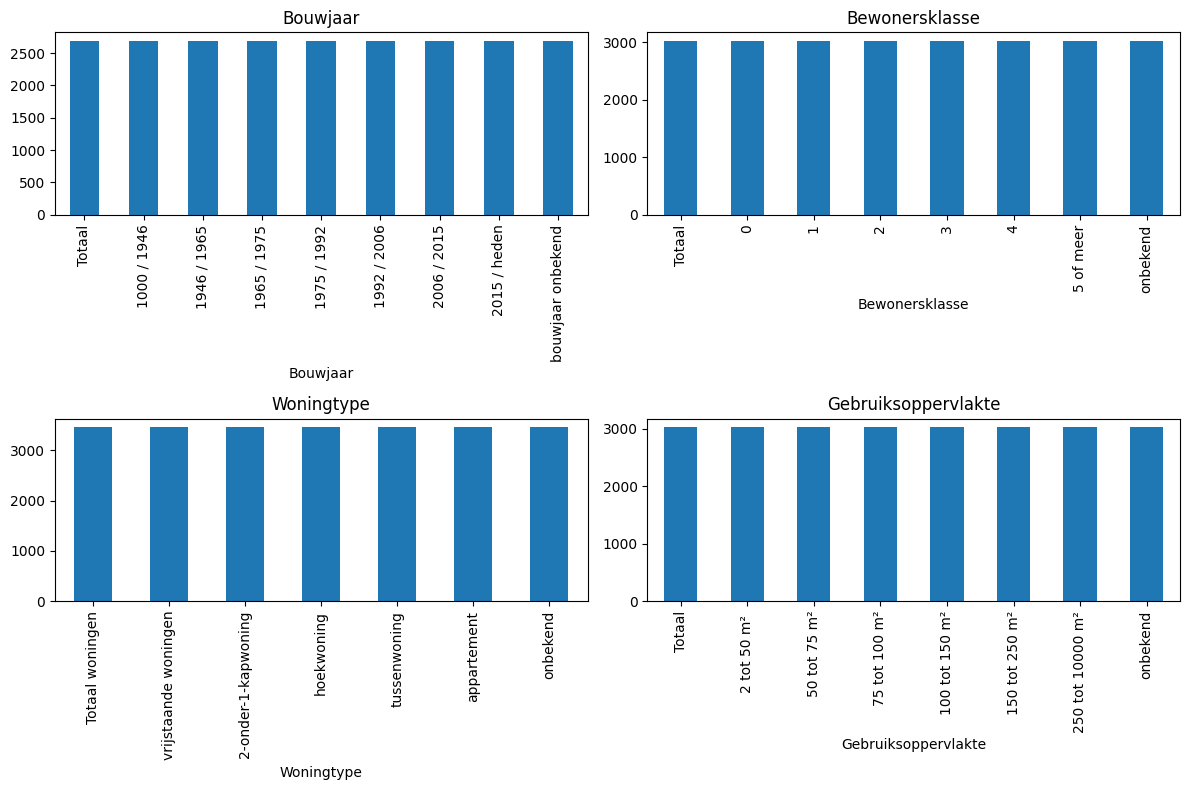

In [266]:
import matplotlib.pyplot as plt
import pandas as pd

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

ElectricityData['Bouwjaar'].value_counts().plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_title('Bouwjaar')

ElectricityData['Bewonersklasse'].value_counts().plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('Bewonersklasse')

ElectricityData['Woningtype'].value_counts().plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Woningtype')

ElectricityData['Gebruiksoppervlakte'].astype(str).value_counts().plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Gebruiksoppervlakte')

plt.tight_layout()
plt.show()


Out of these graphs we can conclude that the data from our database has been sampled before since every value in the categories has the same amount of values in it. I also note that there is a feature called onbekend which means unknown. Logically speaking I would conclude that this data should not be used for the prediction since it is unknown which means that is has no meaning. To check the correlation between onbekend and missing values i am going to plot graphs for the 4 categorical features

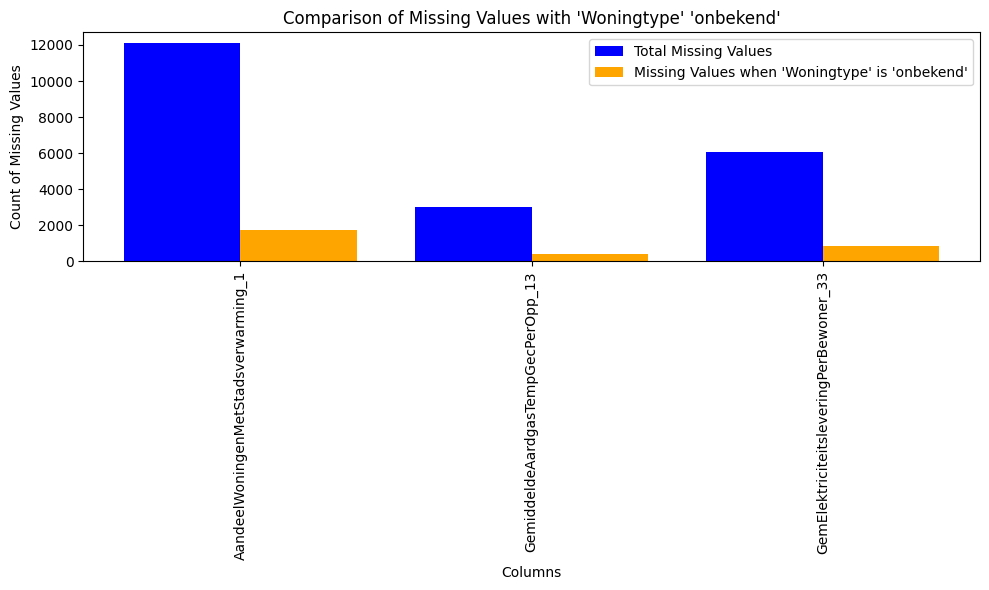

In [267]:
import pandas as pd
import matplotlib.pyplot as plt


filtered_data = ElectricityData[ElectricityData["Woningtype"] == "onbekend"]
total_missing_values = ElectricityData.isnull().sum()
missing_values = filtered_data.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0].index

plt.figure(figsize=(10, 6))
bar_width = 0.4
index = range(len(columns_with_missing_values))

plt.bar(index, total_missing_values[columns_with_missing_values], label="Total Missing Values", width=bar_width, color="blue")
plt.bar([i + bar_width for i in index], missing_values[columns_with_missing_values], label="Missing Values when 'Woningtype' is 'onbekend'", width=bar_width, color="orange")

plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.title("Comparison of Missing Values with 'Woningtype' 'onbekend'")
plt.xticks([i + bar_width / 2 for i in index], columns_with_missing_values, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


The missing values where woningtype are onbekend is significant. In total here we see it is around 3500 missing values across these 3 features.

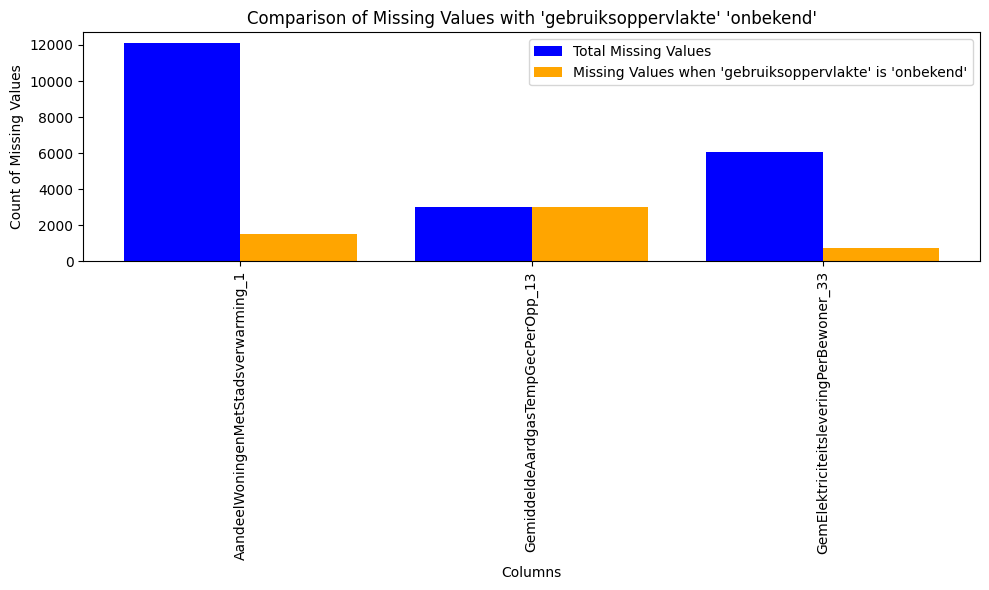

In [268]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_data = ElectricityData[ElectricityData["Gebruiksoppervlakte"] == "onbekend"]

total_missing_values = ElectricityData.isnull().sum()
missing_values = filtered_data.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0].index

plt.figure(figsize=(10, 6))
bar_width = 0.4
index = range(len(columns_with_missing_values))

plt.bar(index, total_missing_values[columns_with_missing_values], label="Total Missing Values", width=bar_width, color="blue")
plt.bar([i + bar_width for i in index], missing_values[columns_with_missing_values], label="Missing Values when 'gebruiksoppervlakte' is 'onbekend'", width=bar_width, color="orange")

plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.title("Comparison of Missing Values with 'gebruiksoppervlakte' 'onbekend'")
plt.xticks([i + bar_width / 2 for i in index], columns_with_missing_values, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

There is an 100% correlation between gebruiksoppervlakte onbekend and the gemiddeldeaardgas missing values. Not only that it also has a significant amount of a relation with the other 2 features.

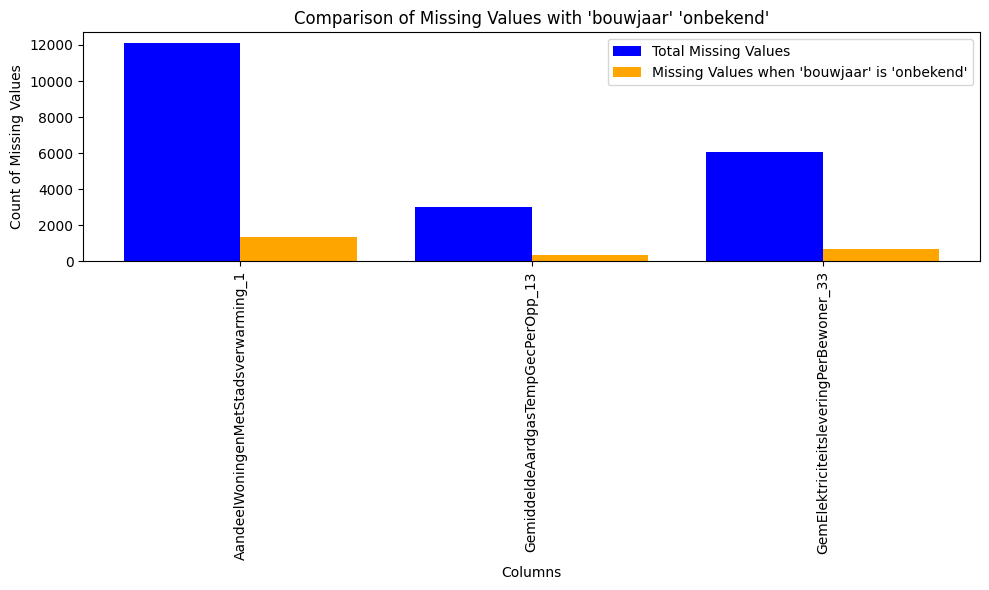

In [269]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_data = ElectricityData[ElectricityData["Bouwjaar"] == "bouwjaar onbekend"]

total_missing_values = ElectricityData.isnull().sum()
missing_values = filtered_data.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0].index

plt.figure(figsize=(10, 6))
bar_width = 0.4
index = range(len(columns_with_missing_values))

plt.bar(index, total_missing_values[columns_with_missing_values], label="Total Missing Values", width=bar_width, color="blue")
plt.bar([i + bar_width for i in index], missing_values[columns_with_missing_values], label="Missing Values when 'bouwjaar' is 'onbekend'", width=bar_width, color="orange")

plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.title("Comparison of Missing Values with 'bouwjaar' 'onbekend'")
plt.xticks([i + bar_width / 2 for i in index], columns_with_missing_values, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

For bouwjaar it looks a lot like the graph of this comparison with the column woningtype. Also around 3000 missing values are caused by this column where the data is onbekend.

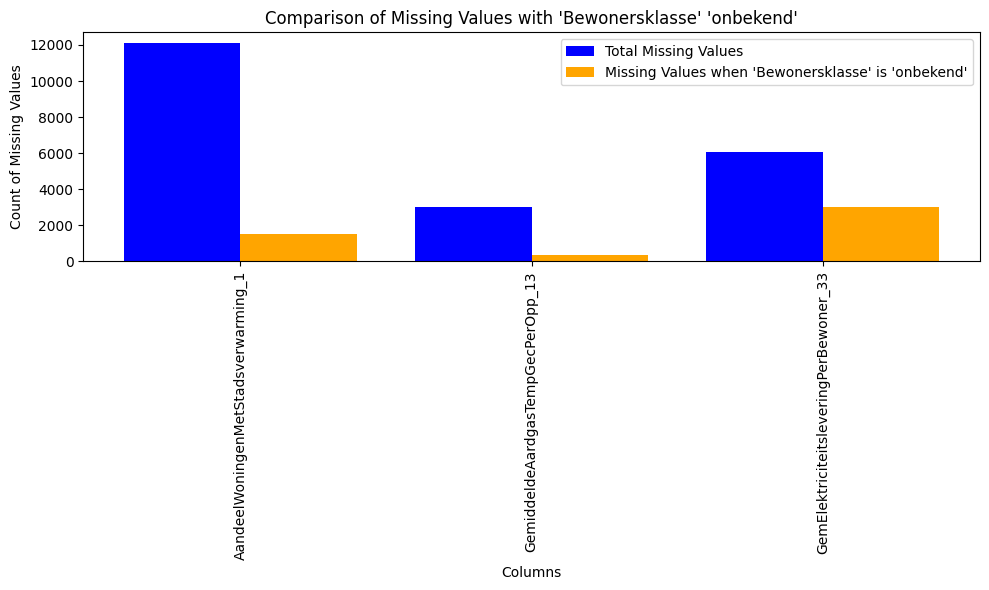

In [270]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_data = ElectricityData[ElectricityData["Bewonersklasse"] == "onbekend"]

total_missing_values = ElectricityData.isnull().sum()
missing_values = filtered_data.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0].index

plt.figure(figsize=(10, 6))
bar_width = 0.4
index = range(len(columns_with_missing_values))

plt.bar(index, total_missing_values[columns_with_missing_values], label="Total Missing Values", width=bar_width, color="blue")
plt.bar([i + bar_width for i in index], missing_values[columns_with_missing_values], label="Missing Values when 'Bewonersklasse' is 'onbekend'", width=bar_width, color="orange")

plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.title("Comparison of Missing Values with 'Bewonersklasse' 'onbekend'")
plt.xticks([i + bar_width / 2 for i in index], columns_with_missing_values, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

For the last categorie Bewonersklasse more than half the missing values of gemelektriciteitsperbewoners are caused by this.

After analysing these 4 graphs I conclude that there is defintly a big correlation between the onbekend value and missing value, in the case GemiddeldeAardgasTempGecPerOpp_13 and onbekend in gebruiksoppervlakte have an 100% overlap. but also Bewonersklasse there is alot of overlap. Because onbekend is not usefull information and has alot of missing values I am going to remove these from the dataset.

In [271]:

ElectricityData = ElectricityData[(ElectricityData['Bouwjaar'] != 'bouwjaar onbekend') & (ElectricityData['Bewonersklasse'] != 'onbekend') & (ElectricityData['Woningtype'] != 'onbekend') & (ElectricityData['Gebruiksoppervlakte'] != 'onbekend')]
columns_to_check = ["Woningtype", "Gebruiksoppervlakte","Bouwjaar", "Bewonersklasse", "Hoofdverwarmingsinstallatie", "Perioden",]

unique_values = ElectricityData[columns_to_check].apply(lambda x: x.unique())
print(unique_values)

Woningtype                       [Totaal woningen, vrijstaande woningen, 2-onder-1-kapwoning, hoekwoning, tussenwoning, appartement]
Gebruiksoppervlakte            [Totaal, 2 tot 50 m² , 50 tot 75 m², 75 tot 100 m², 100 tot 150 m², 150 tot 250 m², 250 tot 10000 m²]
Bouwjaar                        [Totaal, 1000 / 1946, 1946 / 1965, 1965 / 1975, 1975 / 1992, 1992 / 2006, 2006 / 2015, 2015 / heden]
Bewonersklasse                                                                                    [Totaal, 0, 1, 2, 3, 4, 5 of meer]
Hoofdverwarmingsinstallatie                                                               [Totaal, Individuele cv en blokverwarming]
Perioden                                                                                                          [2019, 2020, 2021]
dtype: object


We see that the onbekend value has been removed correctly from all four the categories. lets see what that changed for our missing values

In [272]:
columns_to_check = ["Woningtype", "Gebruiksoppervlakte", "Bouwjaar", "Bewonersklasse", "Hoofdverwarmingsinstallatie", "Perioden", "AandeelWoningenMetStadsverwarming_1", "AandeelWoningenZonnestroomOpAdres_2", "GemiddeldeAardgasleveringTempGecorr_3", "GemiddeldeAardgasTempGecPerOpp_13", "GemiddeldeElektriciteitslevering_23", "GemElektriciteitsleveringPerBewoner_33"]

missing_values = ElectricityData[columns_to_check].isnull().sum()
print(missing_values)

Woningtype                                   0
Gebruiksoppervlakte                          0
Bouwjaar                                     0
Bewonersklasse                               0
Hoofdverwarmingsinstallatie                  0
Perioden                                     0
AandeelWoningenMetStadsverwarming_1       7056
AandeelWoningenZonnestroomOpAdres_2          0
GemiddeldeAardgasleveringTempGecorr_3        0
GemiddeldeAardgasTempGecPerOpp_13            0
GemiddeldeElektriciteitslevering_23          0
GemElektriciteitsleveringPerBewoner_33    2016
dtype: int64


Now we only have 2 columns left with missing values Lets see if we can find any reason why these values of gemelektriciteitsleveringperbewoners are missing.

In [273]:
ElectricityData[ElectricityData['GemElektriciteitsleveringPerBewoner_33'].isnull()].head()

,ID,Woningtype,Gebruiksoppervlakte,Bouwjaar,Bewonersklasse,Hoofdverwarmingsinstallatie,Perioden,AandeelWoningenMetStadsverwarming_1,AandeelWoningenZonnestroomOpAdres_2,GemiddeldeAardgasleveringTempGecorr_3,GemiddeldeAardgasTempGecPerOpp_13,GemiddeldeElektriciteitslevering_23,GemElektriciteitsleveringPerBewoner_33
6,6,Totaal woningen,Totaal,Totaal,0,Totaal,2019,3.9,5.0,1120,12.0,1950,NaN
7,7,Totaal woningen,Totaal,Totaal,0,Totaal,2020,4.6,7.0,1120,13.3,2040,NaN
8,8,Totaal woningen,Totaal,Totaal,0,Totaal,2021,4.4,8.0,1110,13.0,2020,NaN
9,9,Totaal woningen,Totaal,Totaal,0,Individuele cv en blokverwarming,2019,NaN,6.0,1190,12.2,1940,NaN
10,10,Totaal woningen,Totaal,Totaal,0,Individuele cv en blokverwarming,2020,NaN,7.0,1200,13.8,2010,NaN


I notice here that the bewonersklasse for these 5 examples are all 0 which would make sense why the value is missing since if there are no people living in the building then you cant get the electricity per person. I am going to check for howmany cases the missing value is related to bewonersklasse 0

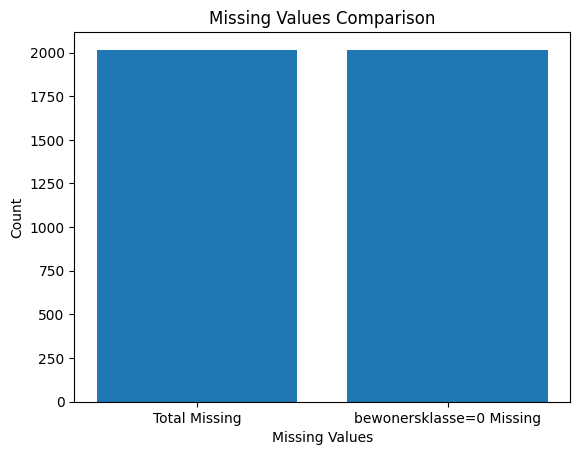

In [274]:
import matplotlib.pyplot as plt

total_missing = ElectricityData['GemElektriciteitsleveringPerBewoner_33'].isnull().sum()
missing_with_bewonersklasse_0 = ElectricityData[(ElectricityData['Bewonersklasse'] == '0') & ElectricityData['GemElektriciteitsleveringPerBewoner_33'].isnull()].shape[0]

labels = ['Total Missing', 'bewonersklasse=0 Missing']
values = [total_missing, missing_with_bewonersklasse_0]

plt.bar(labels, values)
plt.xlabel('Missing Values')
plt.ylabel('Count')
plt.title('Missing Values Comparison')
plt.show()



As we can see this has a 100% correlation and to fix these missing values I am going to set the nan value to 0 since that would be accurate when there are no people living in the building the elctricity usage per person is 0. However we need to be carefull with taking averages of this column now since they will be affected by this change.

In [275]:
ElectricityData['GemElektriciteitsleveringPerBewoner_33'].fillna(0, inplace=True)
missing_values = ElectricityData['GemElektriciteitsleveringPerBewoner_33'].isnull().sum()
print(missing_values)

0


The column for gemelektriciteitsleveringperbewoners is now also cleaned.

Fow now I am going to fill in the last missing values in the AandeelWoningenMetStadsverwarming_1 column -1 since the heatmap show nearly no correlation to the target variable and according to the domain understanding this also fits. I can't remove these rows because there will be to much valuable information lost otherwise.

In [276]:
ElectricityData['AandeelWoningenMetStadsverwarming_1'].fillna(-1, inplace=True)
missing_values = ElectricityData['AandeelWoningenMetStadsverwarming_1'].isnull().sum()
print(missing_values)

0


the last column with missing values is done now.

I noticed that there are still some missing values in the electriciteitslevering column with ' ' I am going to use a temp dataframe with these values changed to nan so I can make the graph to see any correlation between bouwjaar and the electriciteitslevering.

There were still some issues with the target variable column with whitespaces and comma's lets fix this first

In [277]:
import pandas as pd

ElectricityData['GemiddeldeElektriciteitslevering_23'] = pd.to_numeric(
    ElectricityData['GemiddeldeElektriciteitslevering_23'].replace(' ', '').replace('.', '', regex=False), errors='coerce'
)
ElectricityData = ElectricityData.dropna(subset=['GemiddeldeElektriciteitslevering_23'])

# Data understanding
We already have done some data understanding by making a data dictionary and analysing features with missing values. But now we are going to focus on the relation between features them selfs.

C:\Users\dolma\AppData\Local\Temp\ipykernel_28788\1370245005.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Bouwjaar', y='GemiddeldeElektriciteitslevering_23', data=ElectricityDatatemp, ci=None, palette='viridis', estimator=np.mean)
c:\Users\dolma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dolma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dolma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categoric

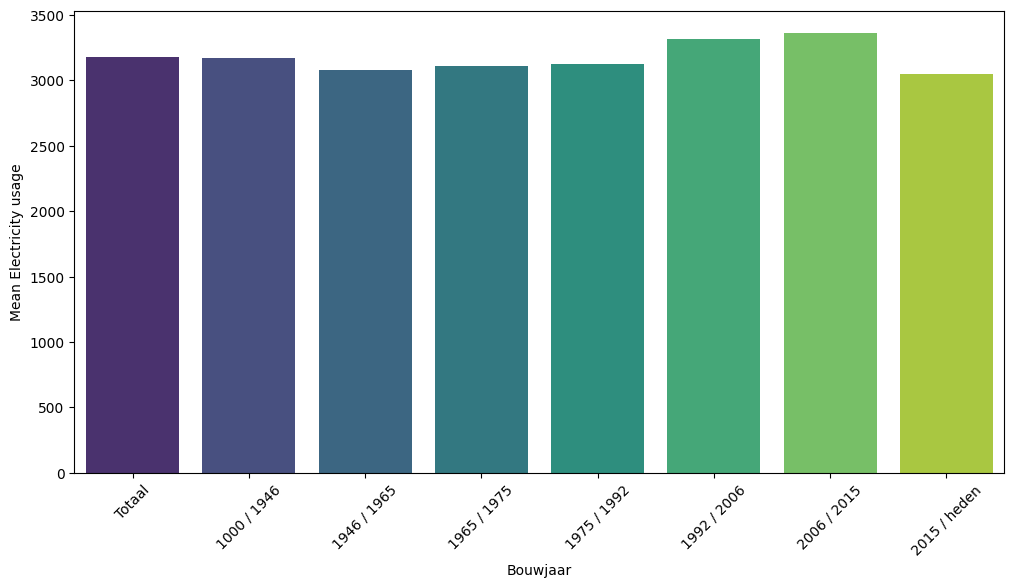

In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ElectricityDatatemp = ElectricityData.copy()
ElectricityDatatemp['GemiddeldeElektriciteitslevering_23'] = pd.to_numeric(ElectricityDatatemp['GemiddeldeElektriciteitslevering_23'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.barplot(x='Bouwjaar', y='GemiddeldeElektriciteitslevering_23', data=ElectricityDatatemp, ci=None, palette='viridis', estimator=np.mean)

plt.xlabel('Bouwjaar')
plt.ylabel('Mean Electricity usage')
plt.xticks(rotation=45)
plt.show()

By the looks of it Bouwjaar does not have much impact on the electricity usage. This goes against my expectations and domain understanding so this needs to be analysed more in the feature selection. However 2015/heden is a bit lower then the rest which could still help the model make a prediction.

C:\Users\dolma\AppData\Local\Temp\ipykernel_28788\3083910314.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Woningtype', y='GemiddeldeElektriciteitslevering_23', data=ElectricityDatatemp, ci=None, palette='viridis', estimator=np.mean)
c:\Users\dolma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dolma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dolma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categor

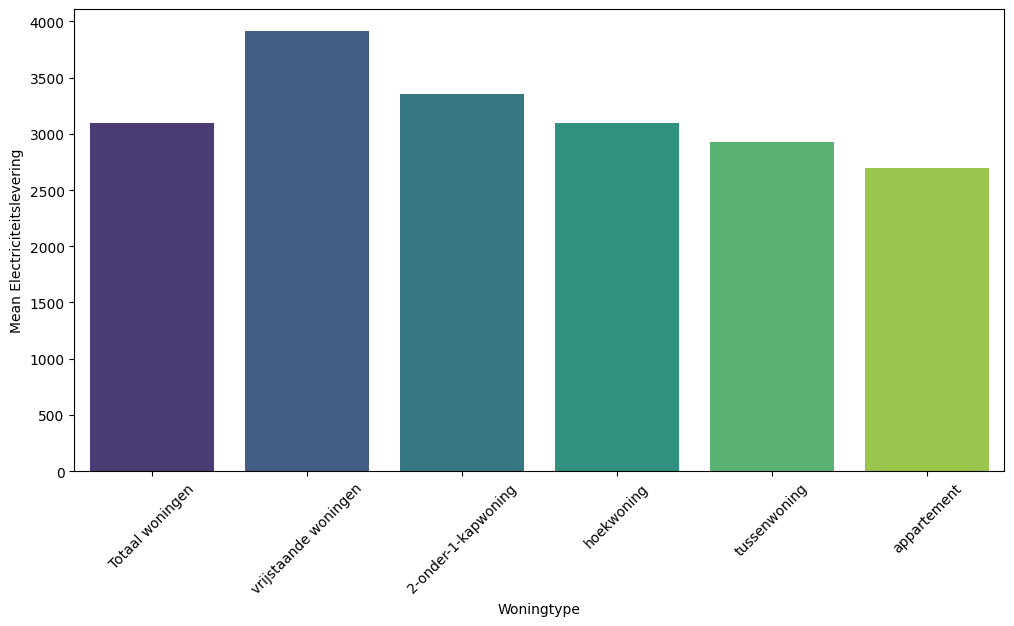

In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ElectricityDatatemp = ElectricityData.copy()
ElectricityDatatemp['GemiddeldeElektriciteitslevering_23'] = pd.to_numeric(ElectricityDatatemp['GemiddeldeElektriciteitslevering_23'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.barplot(x='Woningtype', y='GemiddeldeElektriciteitslevering_23', data=ElectricityDatatemp, ci=None, palette='viridis', estimator=np.mean)

plt.xlabel('Woningtype')
plt.ylabel('Mean Electriciteitslevering')
plt.xticks(rotation=45)
plt.show()


Woningtype does have a correlation with the target variable. As we can see there is quite a big difference between an appartment and vrijstaande woning. This feature is going to be important for predictions.

C:\Users\dolma\AppData\Local\Temp\ipykernel_28788\609099562.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Bewonersklasse', y='GemiddeldeElektriciteitslevering_23', data=ElectricityDatatemp, ci=None, palette='viridis', estimator=np.mean)
c:\Users\dolma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dolma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dolma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_cate

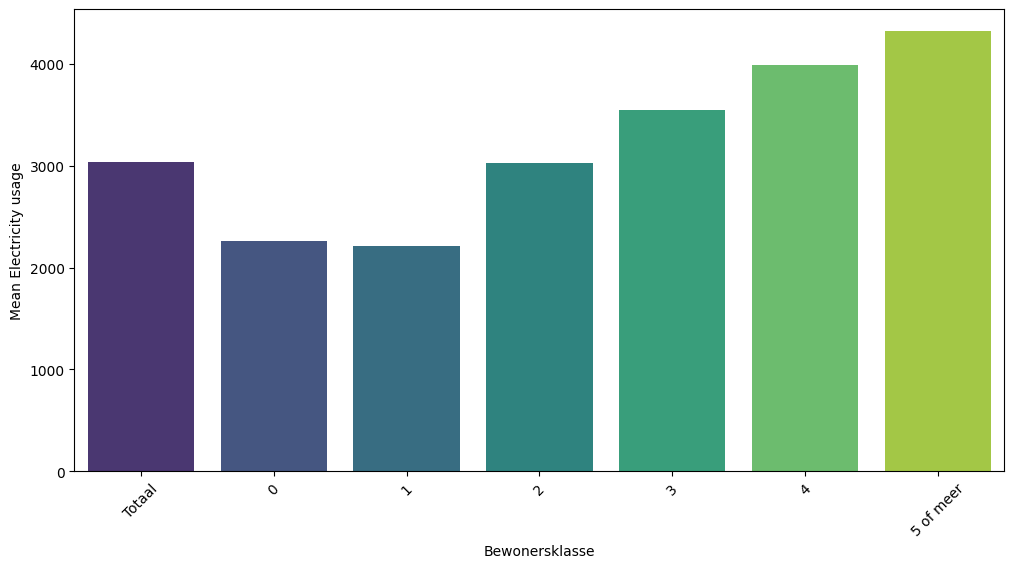

In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ElectricityDatatemp = ElectricityData.copy()
ElectricityDatatemp['GemiddeldeElektriciteitslevering_23'] = pd.to_numeric(ElectricityDatatemp['GemiddeldeElektriciteitslevering_23'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.barplot(x='Bewonersklasse', y='GemiddeldeElektriciteitslevering_23', data=ElectricityDatatemp, ci=None, palette='viridis', estimator=np.mean)

plt.xlabel('Bewonersklasse')
plt.ylabel('Mean Electricity usage')
plt.xticks(rotation=45)
plt.show()

There is also a significant difference in Electricity usage based on the amount of dwellers. The mean of the highest and lowest is around 2000, which is a lot knowing that the highest value we have is 6000. This feature like we thought based on domain understanding is an important one.

<Figure size 1000x600 with 0 Axes>

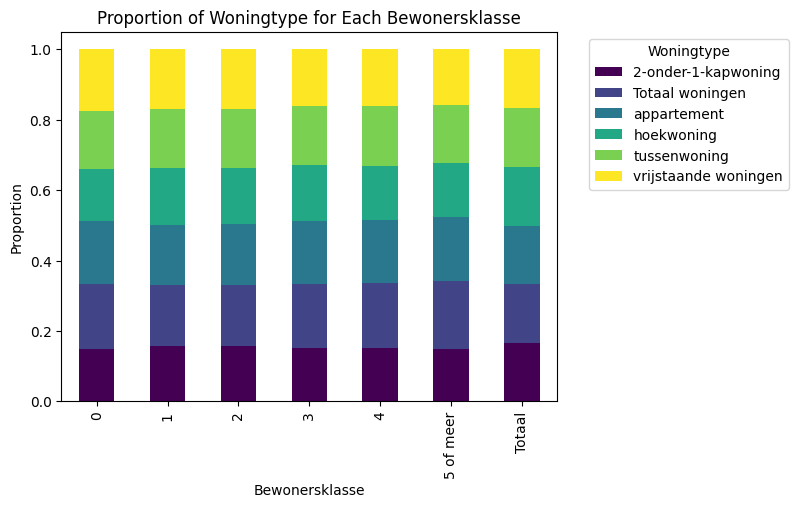

In [281]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cross_tab = pd.crosstab(ElectricityData['Bewonersklasse'], ElectricityData['Woningtype'], normalize='index')

plt.figure(figsize=(10, 6))
ax = cross_tab.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Proportion of Woningtype for Each Bewonersklasse')
plt.xlabel('Bewonersklasse')
plt.ylabel('Proportion')
plt.legend(title='Woningtype', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



After plotting a graph that shows the porportion of woningtypes on each bewonersklasse we can tell that the data has been sorted beforehand so that we have the same amount of values on any type. This means we would lose the correlation between these 2 features, so my thought about a correlation between what kind of house people have is impacted by the amount of people living there is lost.

This is also sorted beforehand which means the correlation between features is going to be impossible to analyse with this dataset.

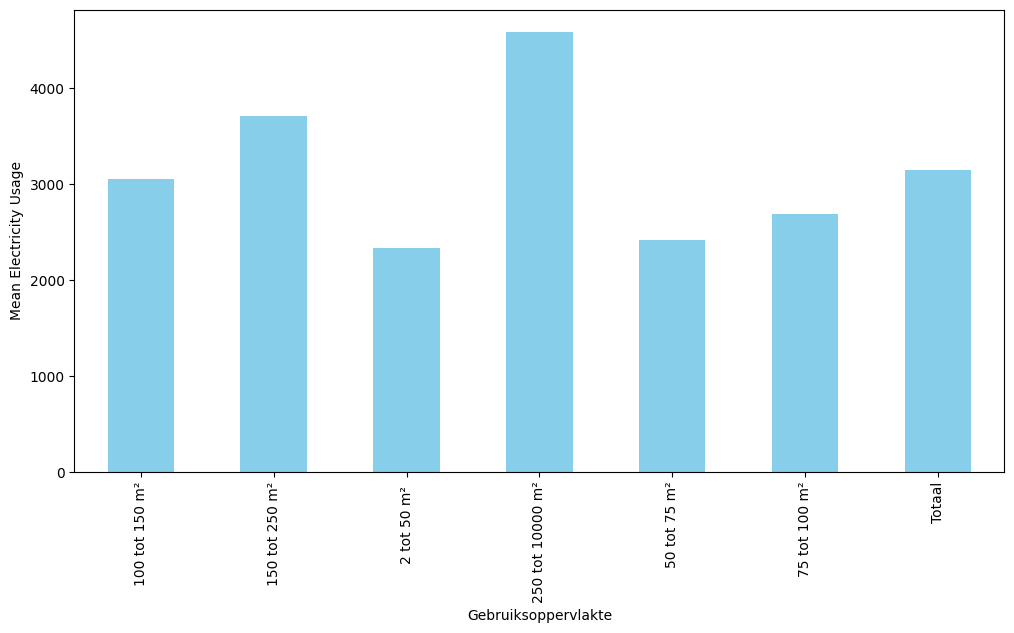

In [282]:

ElectricityData['GemiddeldeElektriciteitslevering_23'] = pd.to_numeric(ElectricityData['GemiddeldeElektriciteitslevering_23'], errors='coerce')

mean_electricity_by_gebruiksoppervlakte = ElectricityData.groupby('Gebruiksoppervlakte')['GemiddeldeElektriciteitslevering_23'].mean()

plt.figure(figsize=(12, 6))
mean_electricity_by_gebruiksoppervlakte.plot(kind='bar', color='skyblue')
plt.xlabel('Gebruiksoppervlakte')
plt.ylabel('Mean Electricity Usage')
plt.show()


This shows there is definitely an important correlation between gebruiksoppervlakte and the electricity consumption you can see there is a clear linear relation between these two. How higher gebruiksoppervlakte the more electricity used. This feature shows the most different mean usage so I am going to guess that this feature is the most important which alligns with out domain understanding where 63% of electricity usage is based on the space you live in.

The data from cbs hasn't been randomly collected due to this the correlation between features has been lost. Looking at the feature compared to the target we still see that there is a correlation. Since the data is categorical and the features are not randomly gathered there isn't much to more to understand, there are five categories that impact the target variable and there are no relation between these 5 categories.

### conclusion
After plotting graphs of features against the target we got a better understanding which features are going to be important. I conclude that Gebruiksoppervlakte is the most important followed by Woningtype and Bewonersklasse. Bouwjaar doesn't show big variances in mean electricity consumption so this one might be useless which I didnt expect beforehand. Also after looking into relations between features I noted that these are organised, this means we can't see if the amount of dwellers impacts the woningtype etc.

# preprocess

To make a heatmap I am going to change the categories value to numeric values. Since The issues with label encoding in the first part of the notebook I am also going to do these changes manually instead of label encoding.

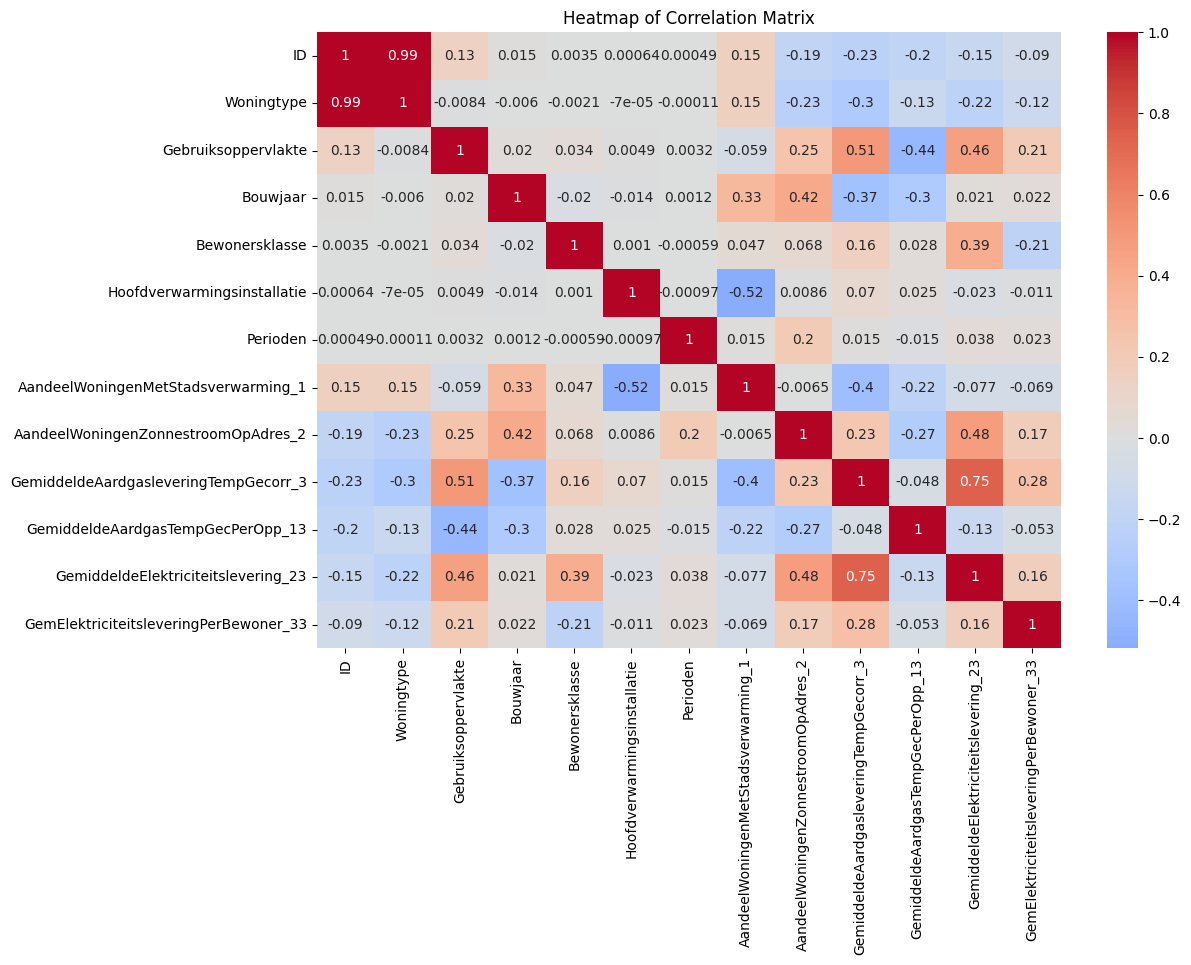

In [283]:

ElectricityData_copy2 = ElectricityData.copy()
columns_to_convert = [ 'Perioden', 
                      'GemiddeldeAardgasleveringTempGecorr_3', 'GemiddeldeAardgasTempGecPerOpp_13', 
                      'GemiddeldeElektriciteitslevering_23', 'GemElektriciteitsleveringPerBewoner_33']

for col in columns_to_convert:
    ElectricityData_copy2[col] = pd.to_numeric(ElectricityData_copy2[col], errors='coerce')

ElectricityData_copy2['Woningtype'] = ElectricityData_copy2['Woningtype'].replace('Totaal woningen', '0')
ElectricityData_copy2['Woningtype'] = ElectricityData_copy2['Woningtype'].replace('vrijstaande woningen', '1')
ElectricityData_copy2['Woningtype'] = ElectricityData_copy2['Woningtype'].replace('2-onder-1-kapwoning', '2')
ElectricityData_copy2['Woningtype'] = ElectricityData_copy2['Woningtype'].replace('hoekwoning', '3')
ElectricityData_copy2['Woningtype'] = ElectricityData_copy2['Woningtype'].replace('tussenwoning', '4')
ElectricityData_copy2['Woningtype'] = ElectricityData_copy2['Woningtype'].replace('appartement', '5')
ElectricityData_copy2['Woningtype'] = ElectricityData_copy2['Woningtype'].replace('onbekend', '6')  
ElectricityData_copy2['Bouwjaar'] = ElectricityData_copy2['Bouwjaar'].replace('Totaal', '0')
ElectricityData_copy2['Bouwjaar'] = ElectricityData_copy2['Bouwjaar'].replace('1000 / 1946', '1')
ElectricityData_copy2['Bouwjaar'] = ElectricityData_copy2['Bouwjaar'].replace('1946 / 1965', '2')
ElectricityData_copy2['Bouwjaar'] = ElectricityData_copy2['Bouwjaar'].replace('1965 / 1975', '3')
ElectricityData_copy2['Bouwjaar'] = ElectricityData_copy2['Bouwjaar'].replace('1975 / 1992', '4')
ElectricityData_copy2['Bouwjaar'] = ElectricityData_copy2['Bouwjaar'].replace('1992 / 2006', '5')
ElectricityData_copy2['Bouwjaar'] = ElectricityData_copy2['Bouwjaar'].replace('2006 / 2015', '6')
ElectricityData_copy2['Bouwjaar'] = ElectricityData_copy2['Bouwjaar'].replace('2015 / heden', '7')
ElectricityData_copy2['Bouwjaar'] = ElectricityData_copy2['Bouwjaar'].replace('bouwjaar onbekend', '8')  
ElectricityData_copy2['Gebruiksoppervlakte'] = ElectricityData_copy2['Gebruiksoppervlakte'].replace('Totaal', '0')
ElectricityData_copy2['Gebruiksoppervlakte'] = ElectricityData_copy2['Gebruiksoppervlakte'].replace('2 tot 50 m² ', '1')
ElectricityData_copy2['Gebruiksoppervlakte'] = ElectricityData_copy2['Gebruiksoppervlakte'].replace('50 tot 75 m²', '2')
ElectricityData_copy2['Gebruiksoppervlakte'] = ElectricityData_copy2['Gebruiksoppervlakte'].replace('75 tot 100 m²', '3')
ElectricityData_copy2['Gebruiksoppervlakte'] = ElectricityData_copy2['Gebruiksoppervlakte'].replace('100 tot 150 m²', '4')
ElectricityData_copy2['Gebruiksoppervlakte'] = ElectricityData_copy2['Gebruiksoppervlakte'].replace('150 tot 250 m²', '5')
ElectricityData_copy2['Gebruiksoppervlakte'] = ElectricityData_copy2['Gebruiksoppervlakte'].replace('250 tot 10000 m²', '6')
ElectricityData_copy2['Gebruiksoppervlakte'] = ElectricityData_copy2['Gebruiksoppervlakte'].replace('onbekend', '7')
ElectricityData_copy2['Bewonersklasse'] = ElectricityData_copy2['Bewonersklasse'].replace('Totaal', '0')
ElectricityData_copy2['Bewonersklasse'] = ElectricityData_copy2['Bewonersklasse'].replace('0', '1')
ElectricityData_copy2['Bewonersklasse'] = ElectricityData_copy2['Bewonersklasse'].replace('1', '2')
ElectricityData_copy2['Bewonersklasse'] = ElectricityData_copy2['Bewonersklasse'].replace('2', '3')
ElectricityData_copy2['Bewonersklasse'] = ElectricityData_copy2['Bewonersklasse'].replace('3', '4')
ElectricityData_copy2['Bewonersklasse'] = ElectricityData_copy2['Bewonersklasse'].replace('4', '5')
ElectricityData_copy2['Bewonersklasse'] = ElectricityData_copy2['Bewonersklasse'].replace('5 of meer', '6')
ElectricityData_copy2['Hoofdverwarmingsinstallatie'] = ElectricityData_copy2['Hoofdverwarmingsinstallatie'].replace('Totaal', '0')
ElectricityData_copy2['Hoofdverwarmingsinstallatie'] = ElectricityData_copy2['Hoofdverwarmingsinstallatie'].replace('Individuele cv en blokverwarming', '1')
plt.figure(figsize=(12, 8))
sns.heatmap(ElectricityData_copy2.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlation Matrix')
plt.show()

looking at the heatmap there are 3 features that stand out Woningtype, Gebruiksoppervlakte and Bewonersklasse. However according to my domain understanding Bouwjaar should have a significant impact on energy usage so for now I am going to include bouwjaar aswell.

In [284]:
features = ["Woningtype", "Gebruiksoppervlakte", "Bouwjaar", "Bewonersklasse"]
target = "GemiddeldeElektriciteitslevering_23"

X = ElectricityData_copy2[features]
y = ElectricityData_copy2[target]


In [285]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 13102 observations, of which 10481 are now in the train set, and 2621 in the test set.


After I made the models especially the random forest we can see the feature importance. This clearly shows that te heatmap was right and bouwjaar does not have a significant impact on the model so I am going to remove it from the features to see if that makes the model better

In [286]:
#features = ["Woningtype", "Gebruiksoppervlakte",  "Bewonersklasse"]
#target = "GemiddeldeElektriciteitslevering_23"

#X = ElectricityData_copy2[features]
#y = ElectricityData_copy2[target]

# Modelling

## Nearest neighbour
for my first iteration I am going to use nearest neighbour.

When checking the k means there goes something wrong because it says the accuracy is around 50%, however I know by testing out all kind of different k values the accuracy is around 1,2 % and k 1 is the best. This doesn't add up with the graph.

In [287]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = KNeighborsClassifier(n_neighbors=1) 
model.fit(X_train, y_train)
pred = model.predict(X_test)


score = accuracy_score(pred, y_test)
print("Accuracy:", score)

tolerance = 40  
within_tolerance = abs(y_test - pred) <= tolerance
accuracy_within_tolerance = within_tolerance.mean()
print("Accuracy within tolerance:", accuracy_within_tolerance)

unique_class_labels = np.unique(y_test)
class_names = [str(label) for label in unique_class_labels]

report = classification_report(y_test, pred, labels=unique_class_labels, target_names=class_names)
print("Classification Report:")
print(report)

Accuracy: 0.01755055322396032
Accuracy within tolerance: 0.13010301411674932
Classification Report:
              precision    recall  f1-score   support

      1070.0       0.00      0.00      0.00         1
      1110.0       0.00      0.00      0.00         1
      1120.0       0.00      0.00      0.00         1
      1170.0       0.00      0.00      0.00         1
      1180.0       0.00      0.00      0.00         1
      1200.0       0.00      0.00      0.00         1
      1220.0       0.00      0.00      0.00         1
      1240.0       0.00      0.00      0.00         2
      1260.0       0.00      0.00      0.00         2
      1270.0       0.00      0.00      0.00         1
      1280.0       0.00      0.00      0.00         2
      1290.0       0.00      0.00      0.00         3
      1300.0       0.00      0.00      0.00         3
      1310.0       0.00      0.00      0.00         2
      1320.0       0.00      0.00      0.00         2
      1330.0       0.00      0.00  

c:\Users\dolma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dolma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dolma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

An 1,75% accuracy with k 1 and with 40 lenience 17%. when I use higher k values this goes down by a little bit to 1,5% and 12,5 %. 


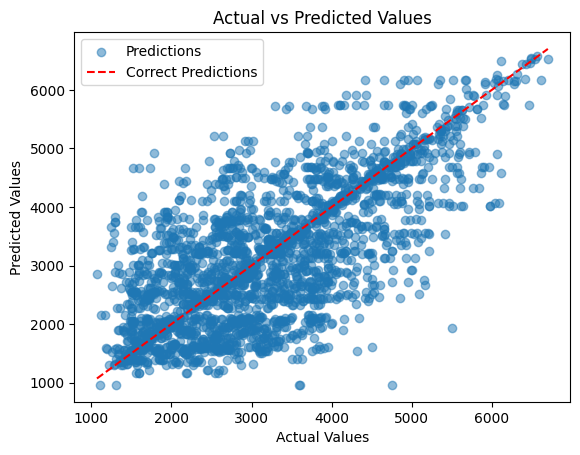

In [288]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_test, pred, alpha=0.5, label='Predictions')
plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100), color='red', linestyle='--', label='Correct Predictions')
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()



The predictions seem random for the 1000 it also predicts 4000 sometimes. This model can predict something about the electricity usage looking at the spread of the guesses at the higher values it is actually not bad at all. 

## linear regression
Since I assume that there is a linear relation between the features and prediction variable my second model is going to be linear regression.

In [289]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("R²:", score)

R²: 0.41374579459489436


In [290]:
from sklearn.model_selection import cross_val_score
r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
for i, r2 in enumerate(r2_scores):
    print(f"Fold {i + 1} - R2 Score: {r2:.2f}")

Fold 1 - R2 Score: -0.02
Fold 2 - R2 Score: 0.22
Fold 3 - R2 Score: 0.41
Fold 4 - R2 Score: 0.43
Fold 5 - R2 Score: 0.54


so the R² of 41% is a good step in the right direction. However the question is if this is an accurate prediction looking at the 5 fold cross validation the first fold has an negative score. I am going to need to look more into this why this happened.

In [291]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores_cv = cross_val_score(model, X, y, cv=kf, scoring=make_scorer(r2_score))

for i, r2 in enumerate(r2_scores_cv):
    print(f"Fold {i + 1} - R2 Score: {r2:.2f}")

average_r2 = r2_scores_cv.mean()
print(f'Average R2 Score: {average_r2:.2f}')

Fold 1 - R2 Score: 0.40
Fold 2 - R2 Score: 0.40
Fold 3 - R2 Score: 0.41
Fold 4 - R2 Score: 0.40
Fold 5 - R2 Score: 0.39
Average R2 Score: 0.40


after shuffling the data the folds now are all close to each other. The average r2 stayed the same.

In [292]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Ridge(alpha=10.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R-squared (R²) score:", r2)


R-squared (R²) score: 0.40023824205544534


Changing the alpha value from 0.1 to 100 doesnt change the prediction outcome so the model seems not to be impacted by overfitting

For now I think linear regression is a way better model to predict the electricity usage, however this model I created is not done yet it still needs some fine tuning and further analysis

## Decision tree

In [293]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, make_scorer

param_grid = {
    'max_depth': [None, 5, 10, 30, 40, 50 ,100 ,200],
    'min_samples_split': [2, 5, 10, 20, 30 ,50 , 100],
    'min_samples_leaf': [1, 2, 4, 8, 15 , 20 ,50]
}

dt_model = DecisionTreeRegressor(random_state=42)

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

grid_search_dt = GridSearchCV(estimator=dt_model,
                               param_grid=param_grid,
                               cv=3,
                               scoring=mse_scorer,
                               verbose=1)

grid_search_dt.fit(X_train, y_train)

best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters for Decision Tree:", best_params_dt)


Fitting 3 folds for each of 392 candidates, totalling 1176 fits


Best Hyperparameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


I did this grid search to find the best hyperparamaters, however after trying around with these I found that depth 9 was better then 10. So I am going to plot a graph that looks into this.

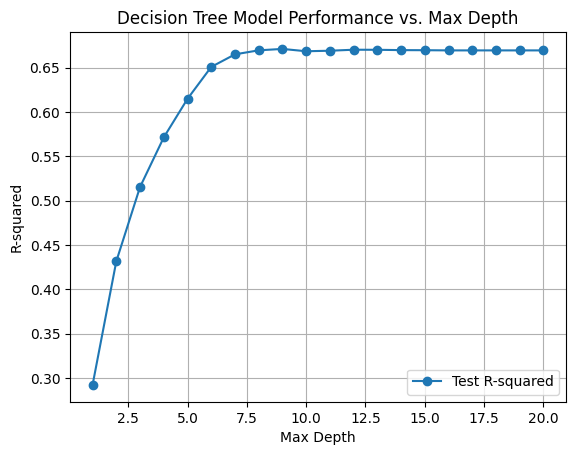

In [294]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import r2_score  
max_depth_values = range(1, 21)
test_scores = [r2_score(y_test, DecisionTreeRegressor(max_depth=depth, random_state=42).fit(X_train, y_train).predict(X_test)) for depth in max_depth_values]

plt.plot(max_depth_values, test_scores, label='Test R-squared', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('R-squared')
plt.title('Decision Tree Model Performance vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()



Looking at this it is clear to me that on depth 9 it makes the best predictions.

In [295]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dt_model = DecisionTreeRegressor(random_state=42, max_depth=9, min_samples_split=2, min_samples_leaf=1)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree - R-squared:", r2_dt)

Decision Tree - R-squared: 0.671007067099607


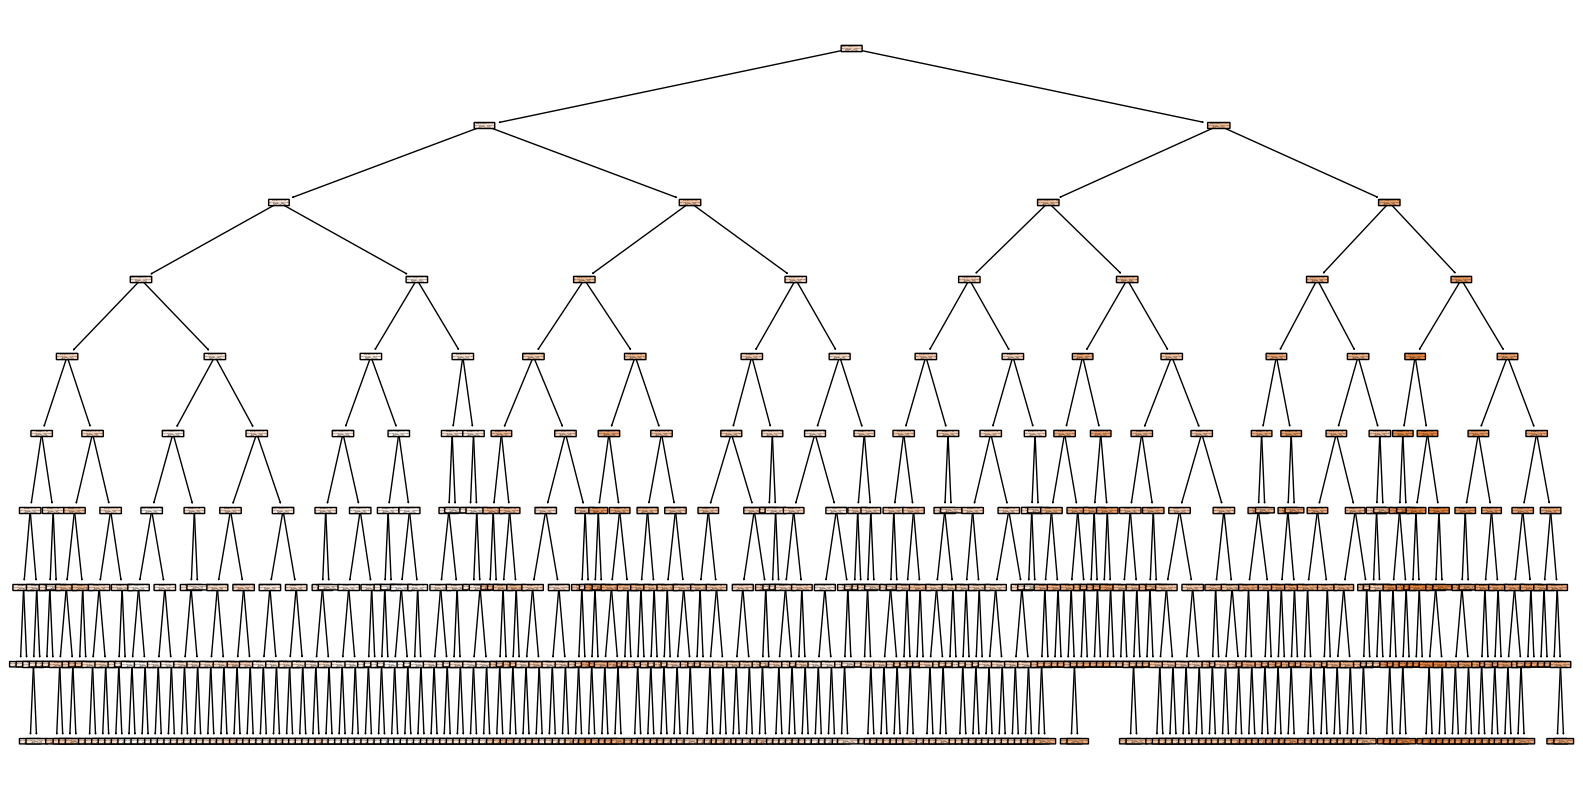

In [296]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X_train.columns.tolist(), rounded=True)
plt.show()




after analysing the tree I notice that Gebruiksoppervlakte is the most important feature since this is the first decision the model makes. To look further into the feature importance I am going to print these out.

In [297]:
dt_model.feature_importances_

array([0.1918049 , 0.57963441, 0.02525168, 0.20330901])

So according to my heatmap and to the feature importance in my decision tree Bouwjaar is not a important feature. And gebruiksoppervlakte is far out the most important one.

## Random forest

In [298]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer

param_grid = {
    'max_depth': [None, 5, 10, 30, 40, 50 ,100 ],
    'min_samples_split': [2, 5, 10, 20, 30 ,50 ],
    'min_samples_leaf': [1, 2, 4, 8, 15 , 20 ]
}

dt_model = RandomForestRegressor(random_state=42)

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

grid_search_dt = GridSearchCV(estimator=dt_model,
                               param_grid=param_grid,
                               cv=3,
                               scoring=mse_scorer,
                               verbose=1)

grid_search_dt.fit(X_train, y_train)

best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters for Decision Tree:", best_params_dt)


Fitting 3 folds for each of 252 candidates, totalling 756 fits
Best Hyperparameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


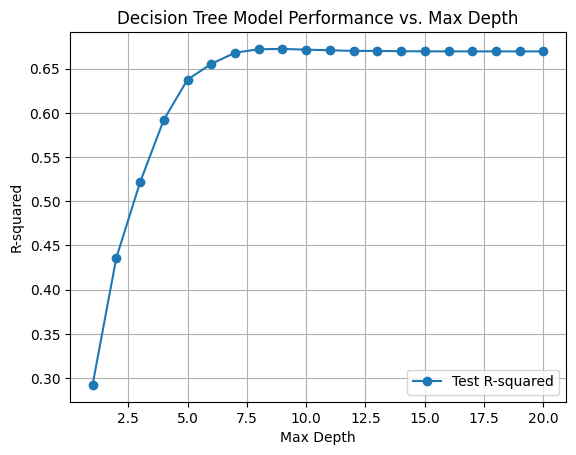

In [299]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import r2_score  
max_depth_values = range(1, 21)
test_scores = [r2_score(y_test, RandomForestRegressor(max_depth=depth, random_state=42).fit(X_train, y_train).predict(X_test)) for depth in max_depth_values]

plt.plot(max_depth_values, test_scores, label='Test R-squared', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('R-squared')
plt.title('Decision Tree Model Performance vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()

just like decision tree when looking firther into max depth 9 seems to be the best so lets use this.

In [300]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pickle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, max_depth=9, min_samples_split=2, min_samples_leaf=1, random_state=42)

rf_model.fit(X_train, y_train)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

y_pred = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)


with open('trained_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)
    
print("R-squared:", r2)
print("Number of samples:", len(y_test))
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_results.head())
print("Cross-Validation Scores:", cv_scores)

R-squared: 0.6724143241079845
Number of samples: 2621
       Actual    Predicted
6246   4170.0  4986.101658
12185  4250.0  4025.024087
5234   3450.0  3150.594808
1566   3330.0  2380.619618
928    1560.0  1999.582540
Cross-Validation Scores: [0.68052225 0.6723169  0.68033133 0.67800135 0.66792638]


c:\Users\dolma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dolma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dolma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dolma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is depr

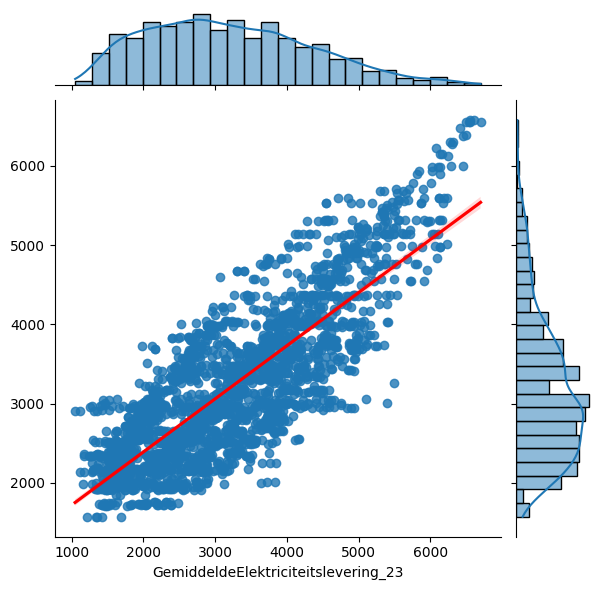

In [301]:
import seaborn as sns

sns.jointplot(x=y_test, y=y_pred, kind='reg', line_kws={'color':'red'})
plt.show()

The predictions are way closer and more often correct in this model compared to the nearest neighbour. The predictions are off by around 1500 or less. but it isn't predicting 4000 for an actual 1000 anymore.

# Feature selection conclusion
After analysing the outcomes with and without Bouwjaar we dont see a significant change If you want to check what it changes to all models you can comment out the code under the moddeling part and re run the notebook I am only going to show the difference in the best model I have(random forest)

In [302]:
features = ["Woningtype", "Gebruiksoppervlakte", "Bewonersklasse"]
target = "GemiddeldeElektriciteitslevering_23"

X = ElectricityData_copy2[features]
y = ElectricityData_copy2[target]

In [303]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)

R-squared: 0.6647216704125589


Accuracy wise There is a decrease of 0.6% when not using bouwjaar as a feature. This is not significant but every % counts.

c:\Users\dolma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dolma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dolma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dolma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is depr

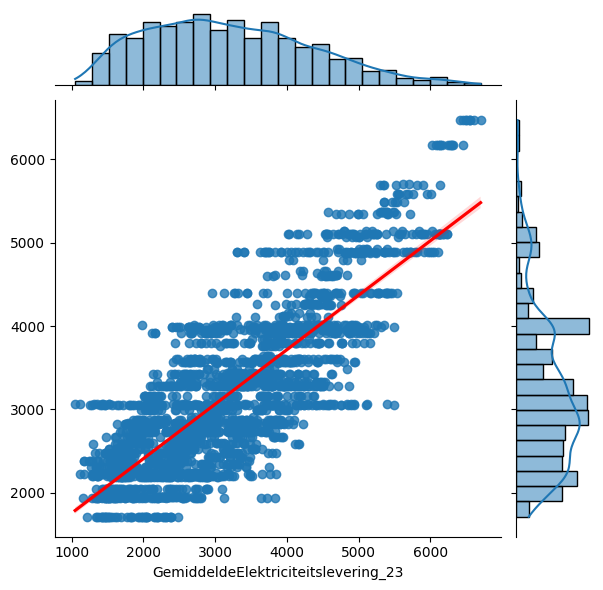

In [304]:
import seaborn as sns

sns.jointplot(x=y_test, y=y_pred, kind='reg', line_kws={'color':'red'})
plt.show()

The predictions without Bouwjaar give an interesting graph. the predictions look like a horizontal line in some cases. Compare this with the graph of all 4 features used you clearly see that without bouwjaar the model is giving the same predictions for different actual values. In this case it might not have a big impact but when we add features that we wanted to add in the data collection part like electrical devices this might have a bigger impact.

# Clustering

In [305]:

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


selected_features = ['Woningtype', 'Gebruiksoppervlakte', 'Bewonersklasse', 'GemiddeldeElektriciteitslevering_23']

ElectricityData_copy2[selected_features] = ElectricityData_copy2[selected_features].apply(pd.to_numeric, errors='coerce')
ElectricityData_copy2.dropna(subset=selected_features, inplace=True)
X = ElectricityData_copy2[selected_features]

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
ElectricityData_copy2['Cluster'] = kmeans.fit_predict(X[['GemiddeldeElektriciteitslevering_23']])

bin_edges = [X['GemiddeldeElektriciteitslevering_23'].min(), 3000, 5000, X['GemiddeldeElektriciteitslevering_23'].max()]
bin_labels = ['Low', 'Medium', 'High']

ElectricityData_copy2['ConsumptionCategory'] = pd.cut(X['GemiddeldeElektriciteitslevering_23'], bins=bin_edges, labels=bin_labels, include_lowest=True)

cluster_means = ElectricityData_copy2.groupby(['Cluster', 'ConsumptionCategory'])[selected_features[:-1]].mean()
print(cluster_means)



                             Woningtype  Gebruiksoppervlakte  Bewonersklasse
Cluster ConsumptionCategory                                                 
0       Low                    2.505215             2.773142        5.064537
        Medium                 2.463574             3.279350        5.152516
        High                        NaN                  NaN             NaN
1       Low                         NaN                  NaN             NaN
        Medium                 2.105739             4.201913        5.275239
        High                   1.434084             5.051447        5.461951
2       Low                    2.868746             2.232530        5.014381
        Medium                      NaN                  NaN             NaN
        High                        NaN                  NaN             NaN


c:\Users\dolma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dolma\AppData\Local\Temp\ipykernel_28788\1297530086.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_means = ElectricityData_copy2.groupby(['Cluster', 'ConsumptionCategory'])[selected_features[:-1]].mean()


I made 3 new classes low,medium and high electricityconsumption I wanted to analyse if any features might have a big difference in these categories. Looking at the results are previous expectations and results seem to overlap only gebruiksoppervlakte has a quite change in values compared to the other 2 features used.

In [306]:
sample_counts = ElectricityData_copy2.groupby(['Cluster', 'ConsumptionCategory']).size().unstack(fill_value=0)
print(sample_counts)


ConsumptionCategory   Low  Medium  High
Cluster                                
0                    1534    3816     0
1                       0    1882   933
2                    4937       0     0


C:\Users\dolma\AppData\Local\Temp\ipykernel_28788\4145119328.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sample_counts = ElectricityData_copy2.groupby(['Cluster', 'ConsumptionCategory']).size().unstack(fill_value=0)


The nan values in the previous table can be explained bu that there are no samples of low,medium, or high consumption in some clustsers which results in nan.

## conclusion analysing these 4 models

after looking at nearest neighbour I conclude that there is for sure a correlation looking at the spread of the guesses, but the accuracy is really low. It is having an hard time predicting pricisely on the dot the electricity usage.
The linear regression shows there is definitely a linear relation between the features and prediction variable. With the r² of 40% it is starting to predict something. Now after looking at the decision tree it became clear that gebruiksoppervlakte is the most important thing when we are looking at electricity usage. The r² is for decision tree 67% and this is exactly the same for random forest. Considering the features that are in this dataset and the importance of these I think that 67% is going to be the best I can predict, however I think if you would find a dataset that goes more into detail about the electrical devices in an building you get way more accurate predictions. The gebruiksoppervlakte is already an important feature for this, but if you can add if this building has ac or the amount of refridgerators you could make an even better prediction.

## Suggestion about what to do next
If you are going to keep going with these project I think getting the numerical values of these categories could make a big impact. Also adding the data of some major electricity devices in the dataset is going to help the prediction alot. Modelling wise I think prediciting the electricity usage with the right data can be done quite precisely with random forest.

# Demonstration
I have used my random forest model with a web server where anyone can input their household features and it shows you the predicted energy usage. This is done by saving the model in this notebook using flask, then I have a flask backend and a html front-end with the values you can put in. 


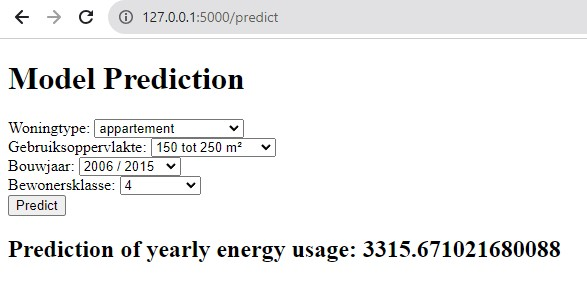

In [307]:
from IPython.display import Image

image_path = "C:\\Users\\dolma\\OneDrive\\Afbeeldingen\\Prediction electricity.jpg"

Image(filename=image_path)
